# EDA

## Importing moduls

And configuting settings

In [1]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import pandas_profiling as pp
import seaborn as sns
import sweetviz as sv

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from lib.data_viz_functions import *

In [2]:
filterwarnings("ignore")
sns.set()

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

%matplotlib inline

In [3]:
train = pd.read_pickle("data/2022-04-05_train_preprocessed.pkl.zip", compression="zip")
test = pd.read_pickle("data/2022-04-05_test_preprocessed.pkl.zip", compression="zip")

## Feature description

- **body_type** - Type of vehicle body (седан, купе, хэтчбек...)  
- **brand** - Manufacture name (bmw, audi...)  
- **color** - Main car's body color  
- **description** - Seller's car description  
- **engine_displacement** - Volume of car's engine (nan if electro)  
- **engine_power** - Engine power in horse powers  
- **fuel_type** - Fuel type (diesel, gasoline, electro...)  
- **km_age** - Vehicle mileage  
- **model_year** - Year when model production was started  
- **number_of_doors** - Number of doors  
- **production_year** - Production year of this car  
- **vehicle_transmission** - Transmission type (auto, robot, mech...)  
- **vendor** - Origin country of brand (EUROPIAN, CHINEESE...)  
- **oweners** - Count of oweners of car  
- **owenership_duration** - Owenership duration  
- **ptc** - Vehicle Registration Certificate (YES, NO, DUP)  
- **drive** - Car drive (4WD, FRONT, REAR)  
- **wheel** - Wheel position in car (RIGHT, LEFT)  
- **price** - Our target column - Car Price  

### Dicts and Lists block

In [4]:
valid_columns_dict = {
    "bodyType": "body_type",
    "engineDisplacement": "engine_displacement",
    "enginePower": "engine_power",
    "fuelType": "fuel_type",
    "mileage": "km_age",
    "modelDate": "model_year",
    "numberOfDoors": "number_of_doors",
    "productionDate": "production_year",
    "vehicleTransmission": "vehicle_transmission",
    "Владельцы": "owners",
    "Владение": "ownership_duration",
    "ПТС": "ptc",
    "Привод": "drive",
    "Руль": "wheel",
}

In [5]:
def get_nans_in_percents(df):
    nans = df.isna().sum() / df.shape[0] * 100
    return nans[nans > 0]


def plot_nans_heatmap(train, test):
    fig, ax = plt.subplots(1, 2, figsize=(14, 4))
    sns.heatmap(train.isna(), cmap="YlGnBu", ax=ax[0], cbar=False).set_title(
        "Heatmap for train dataframe"
    )
    sns.heatmap(test.isna(), cmap="YlGnBu", ax=ax[1], cbar=False).set_title(
        "Heatmap for test dataframe"
    )
    plt.show()

### Changing columns names to english and snake-type (from dict)

In [6]:
train.rename(columns=valid_columns_dict, inplace=True)
test.rename(columns=valid_columns_dict, inplace=True)

## Grouping cols as categorical and numeric

In [7]:
cat_cols = [
    "body_type",
    "brand",
    "color",
    "fuel_type",
    "number_of_doors",
    "vehicle_transmission",
    "vendor",
    "owners",
    "ptc",
    "drive",
    "wheel",
]
nums_cols = [
    "engine_displacement",
    "engine_power",
    "km_age",
    "model_year",
    "production_year",
    "ownership_duration",
]

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115367 entries, 0 to 115368
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   body_type             115367 non-null  object 
 1   brand                 115367 non-null  object 
 2   color                 115367 non-null  object 
 3   description           112155 non-null  object 
 4   engine_displacement   115209 non-null  float64
 5   engine_power          115367 non-null  float32
 6   fuel_type             115367 non-null  object 
 7   km_age                115367 non-null  float32
 8   model_year            115367 non-null  float32
 9   model_name            115367 non-null  object 
 10  number_of_doors       115367 non-null  float32
 11  production_year       115367 non-null  float32
 12  vehicle_transmission  115367 non-null  object 
 13  vendor                115367 non-null  object 
 14  owners                104832 non-null  float64
 15  

## Discovering NA

In [9]:
get_nans_in_percents(train)

description             2.784158
engine_displacement     0.136954
owners                  9.131727
ownership_duration     69.767785
ptc                     0.301646
dtype: float64

In [10]:
get_nans_in_percents(test)

engine_displacement     0.158565
ownership_duration     65.418324
ptc                     0.002883
dtype: float64

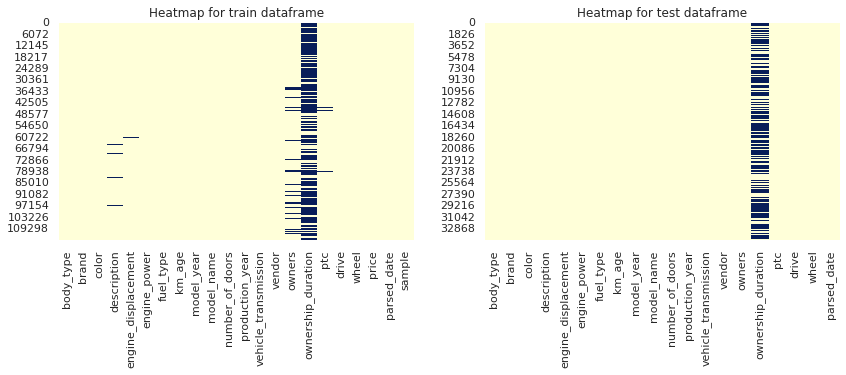

In [11]:
plot_nans_heatmap(train, test)

In [12]:
train.loc[train.km_age.isna()]

,body_type,brand,color,description,engine_displacement,engine_power,fuel_type,km_age,model_year,model_name,number_of_doors,production_year,vehicle_transmission,vendor,owners,ownership_duration,ptc,drive,wheel,price,parsed_date,sample


In [13]:
train.dropna(subset=["km_age"], inplace=True)

## Numeric variables overview

In [14]:
describe_nums(train[nums_cols + ["price"]])

,unique,n/a count,count,mean,std,min,25%,50%,75%,max
km_age,28798,0,115367.000000,140256.546875,99727.398438,0.000000,69208.000000,133000.000000,196821.500000,1000000.000000
price,10660,0,115367.000000,1373094.201236,1908124.369307,16000.000000,391500.000000,750000.000000,1637000.000000,99000000.000000
ownership_duration,536,80489,34878.000000,1680.112076,1309.229959,0.000000,701.000000,1305.000000,2404.000000,15615.000000
engine_power,406,0,115367.000000,176.565292,85.571007,11.000000,117.000000,150.000000,211.000000,800.000000
production_year,81,0,115367.000000,2010.820312,6.889666,1904.000000,2007.000000,2012.000000,2016.000000,2021.000000
model_year,80,0,115367.000000,2008.596069,7.258581,1904.000000,2005.000000,2010.000000,2014.000000,2021.000000
engine_displacement,67,158,115209.000000,2.257130,0.913561,0.700000,1.600000,2.000000,2.500000,8.400000


Unique values count: 67 
Q1: 1.600000023841858
Q3: 2.5
IQR: 0.8999999761581421 
Outliers borders: [0.2500000596046448, 3.849999964237213]


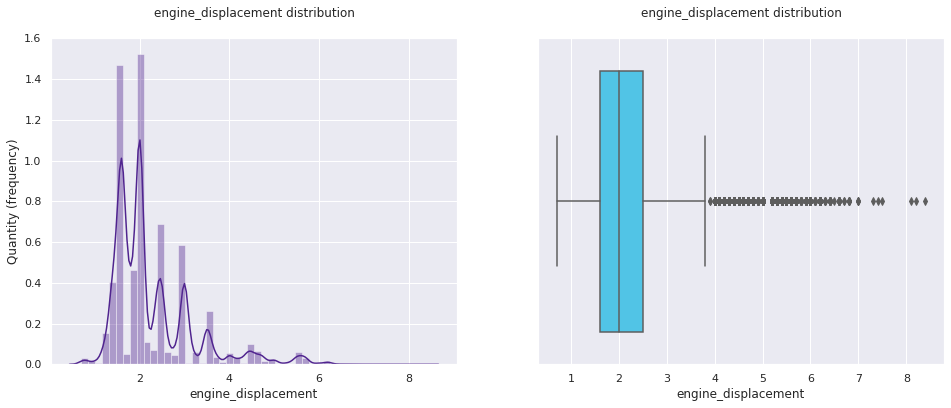

Unique values count: 406 
Q1: 117.0
Q3: 211.0
IQR: 94.0 
Outliers borders: [-24.0, 352.0]


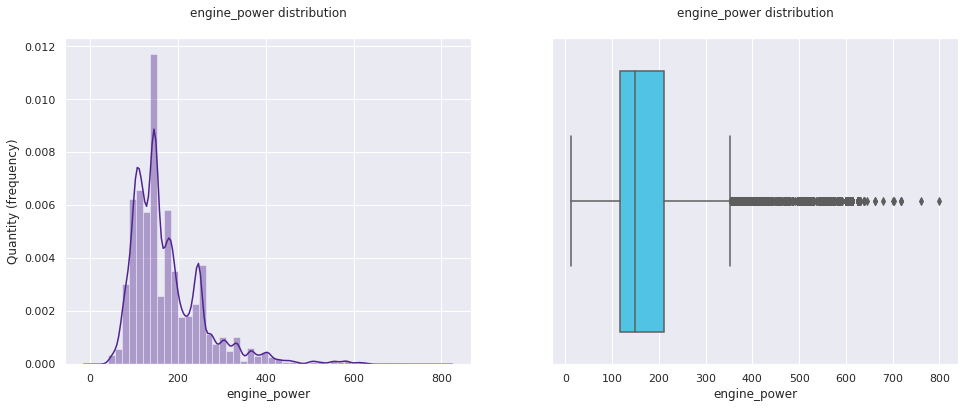

Unique values count: 28798 
Q1: 69208.0
Q3: 196821.5
IQR: 127613.5 
Outliers borders: [-122212.25, 388241.75]


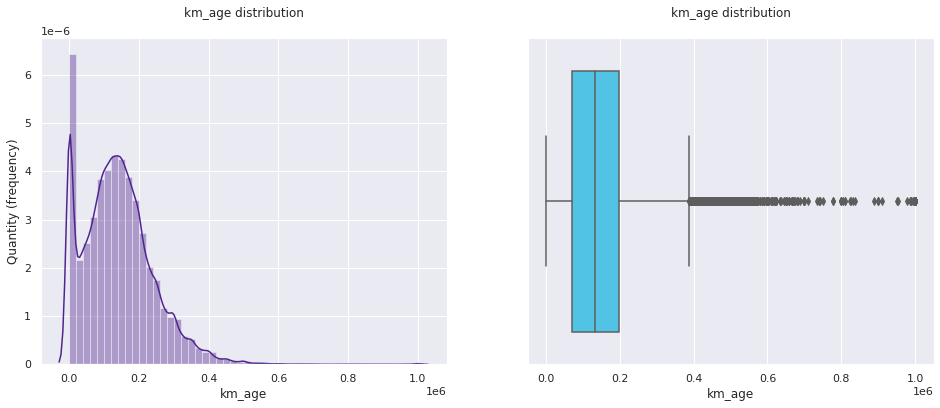

Unique values count: 80 
Q1: 2005.0
Q3: 2014.0
IQR: 9.0 
Outliers borders: [1991.5, 2027.5]


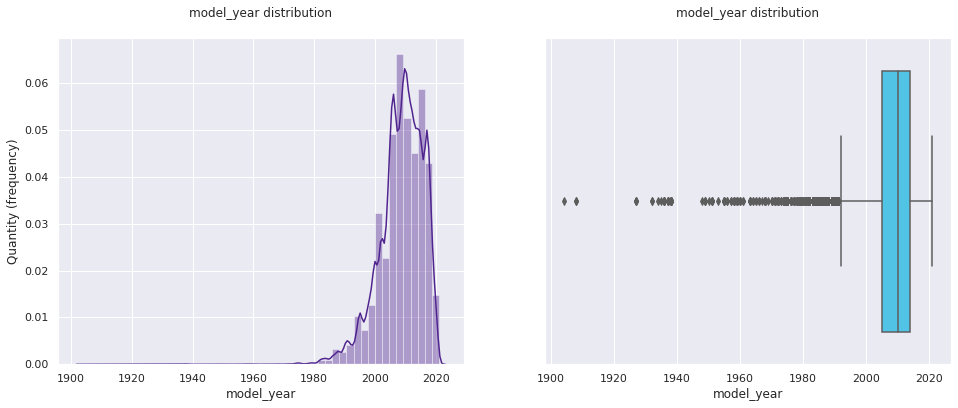

Unique values count: 81 
Q1: 2007.0
Q3: 2016.0
IQR: 9.0 
Outliers borders: [1993.5, 2029.5]


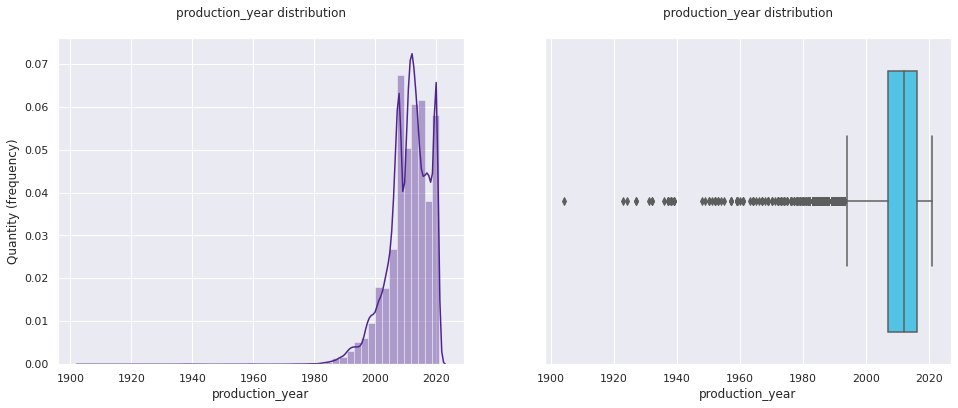

Unique values count: 536 
Q1: 701.0
Q3: 2404.0
IQR: 1703.0 
Outliers borders: [-1853.5, 4958.5]


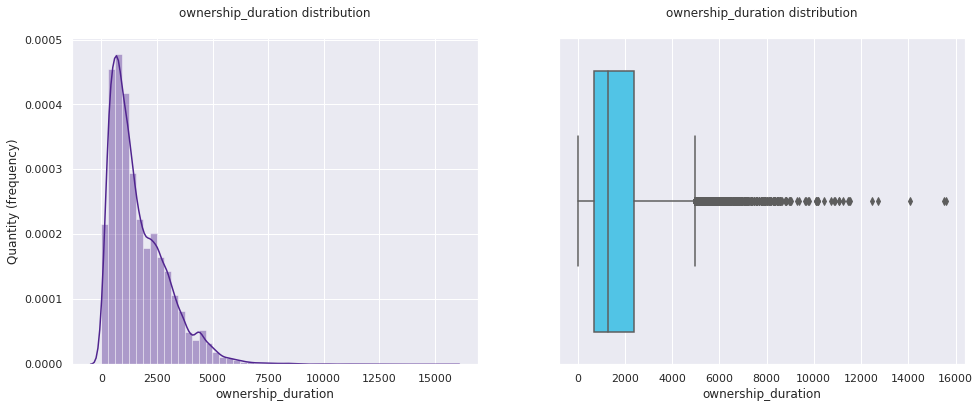

In [15]:
for c in nums_cols:
    show_IQR(train[c])

In [16]:
# for c in nums_cols:
#     show_IQR(test[c])

Unique values count: 35 
Q1: 2.0
Q3: 3.0
IQR: 1.0 
Outliers borders: [0.5, 4.5]


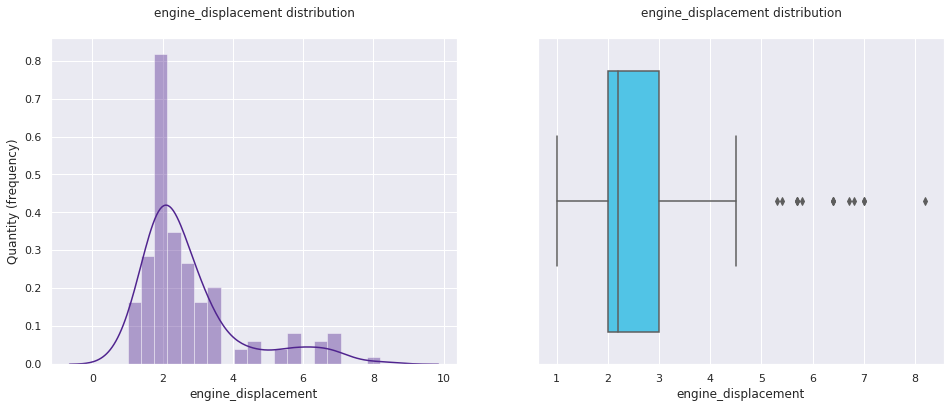

Unique values count: 62 
Q1: 55.0
Q3: 150.0
IQR: 95.0 
Outliers borders: [-87.5, 292.5]


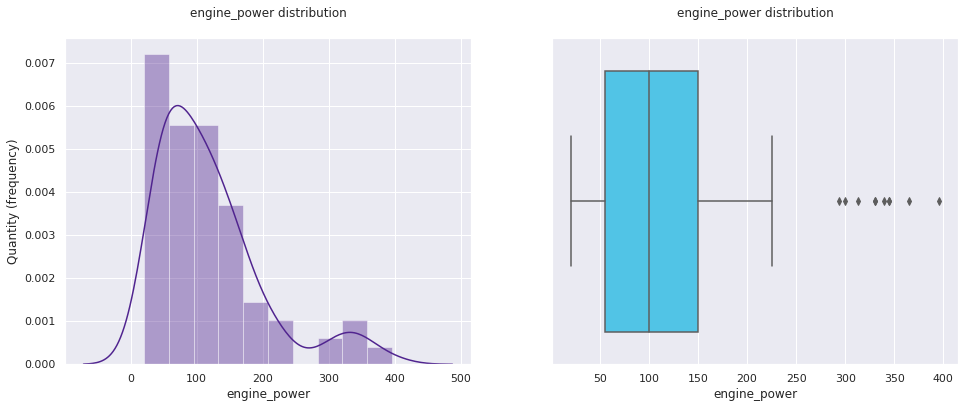

Unique values count: 89 
Q1: 27000.0
Q3: 150000.0
IQR: 123000.0 
Outliers borders: [-157500.0, 334500.0]


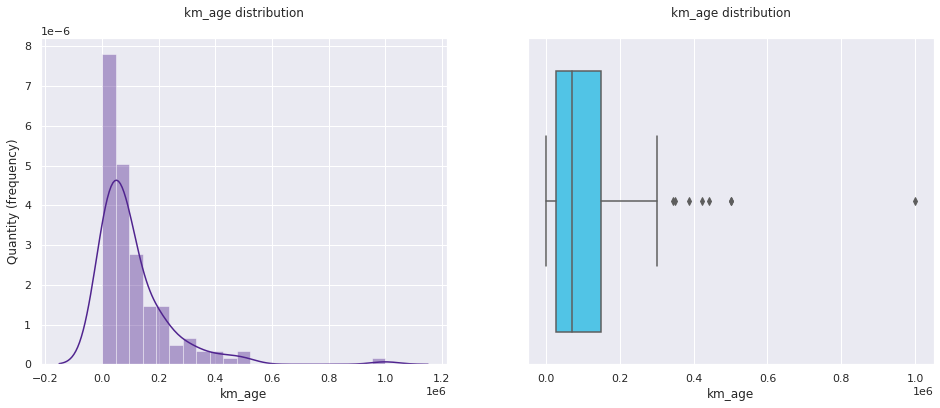

Unique values count: 37 
Q1: 1949.0
Q3: 1972.0
IQR: 23.0 
Outliers borders: [1914.5, 2006.5]


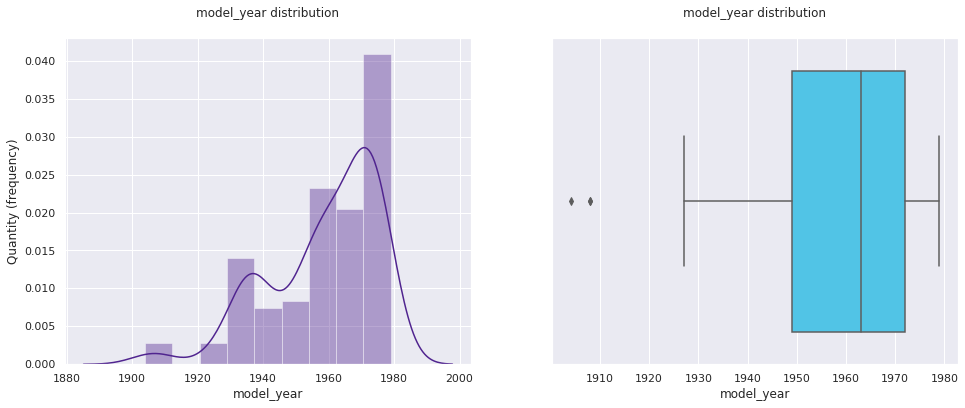

Unique values count: 39 
Q1: 1955.0
Q3: 1976.0
IQR: 21.0 
Outliers borders: [1923.5, 2007.5]


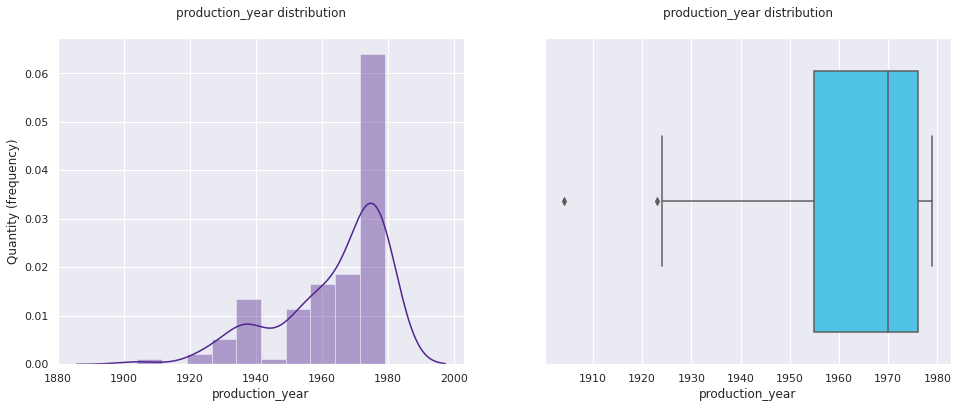

Unique values count: 52 
Q1: 1782.0
Q3: 5692.5
IQR: 3910.5 
Outliers borders: [-4083.75, 11558.25]


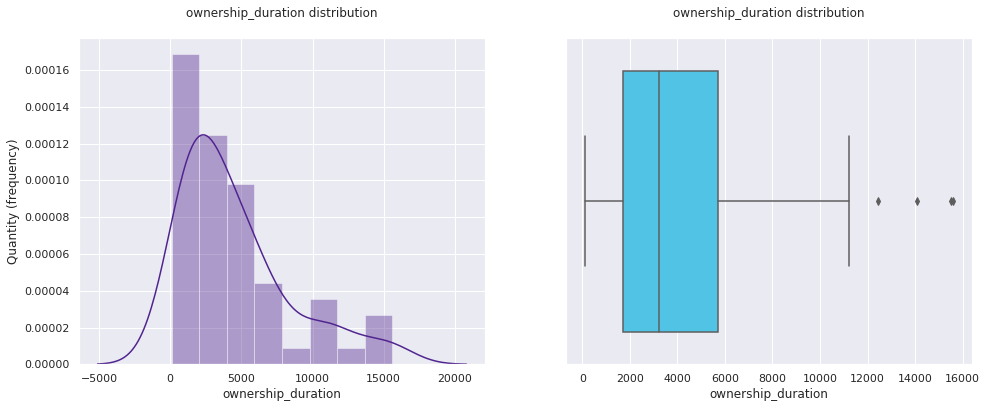

In [17]:
for c in nums_cols:
    show_IQR(train[train["production_year"] < 1980][c])

## Categorical columns overview

In [18]:
train.describe(include="object").T

,count,unique,top,freq
body_type,115367,16,внедорожник,44065
brand,115367,36,MERCEDES,10080
color,115367,16,чёрный,32686
description,112155,103308,рольф северо запад это первый мегамолл автомоб...,244
fuel_type,115367,5,бензин,96259
model_name,115367,1176,OCTAVIA,2545
vehicle_transmission,115367,4,AUTOMATIC,64367
vendor,115367,5,EUROPEAN,56641
ptc,115019,2,Оригинал,100643
drive,115367,3,передний,58265


In [19]:
train["owners"].astype("object").describe()

count     104832.0
unique         3.0
top            3.0
freq       48461.0
Name: owners, dtype: float64

In [20]:
train[cat_cols].describe(exclude="object").T

,count,mean,std,min,25%,50%,75%,max
number_of_doors,115367.0,4.525939,0.654002,0.0,4.0,5.0,5.0,5.0
owners,104832.0,2.192165,0.833943,1.0,1.0,2.0,3.0,3.0


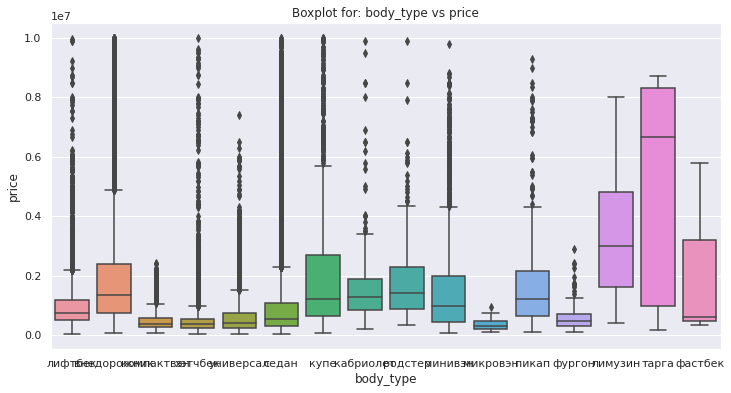

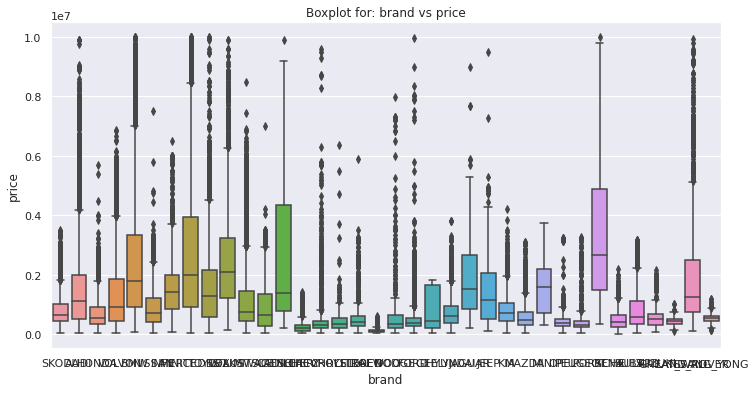

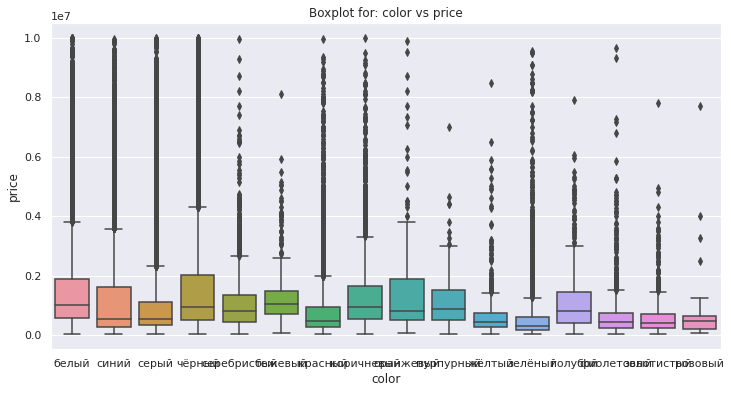

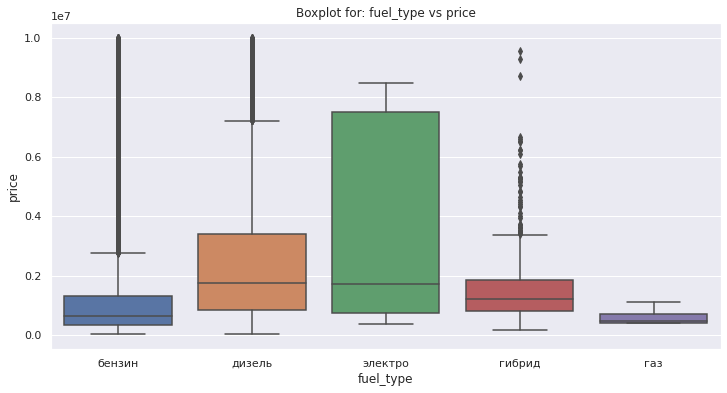

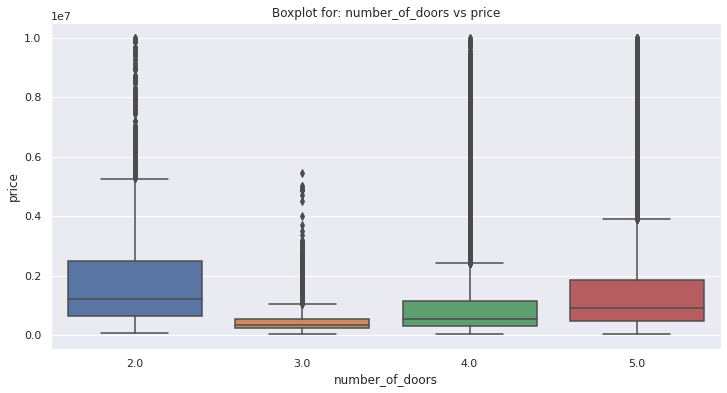

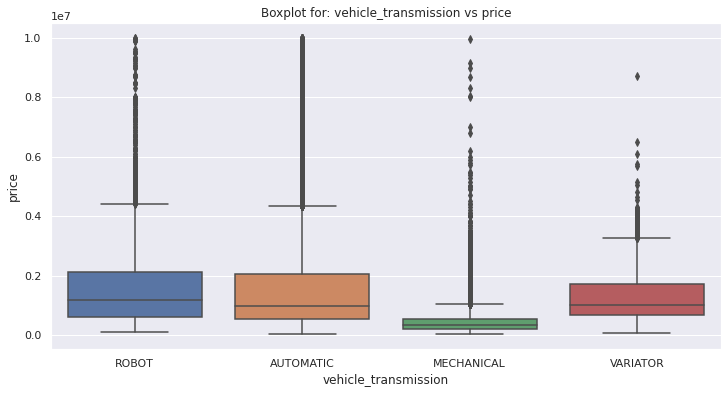

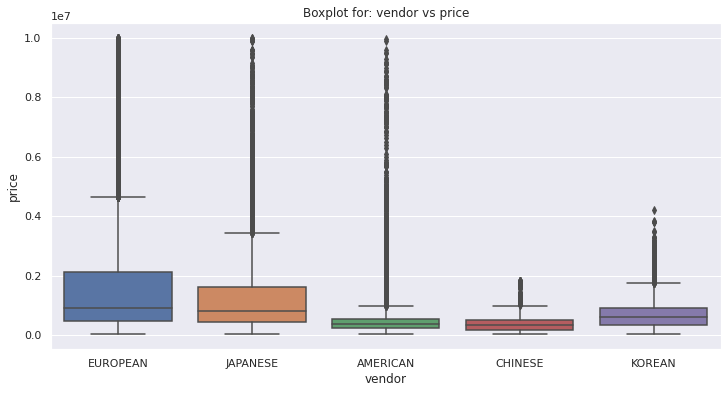

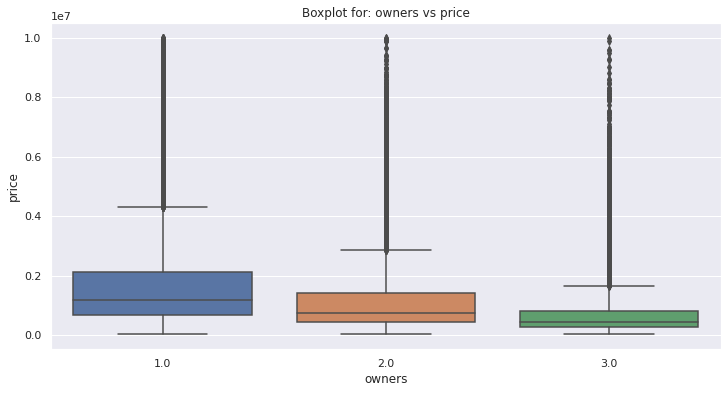

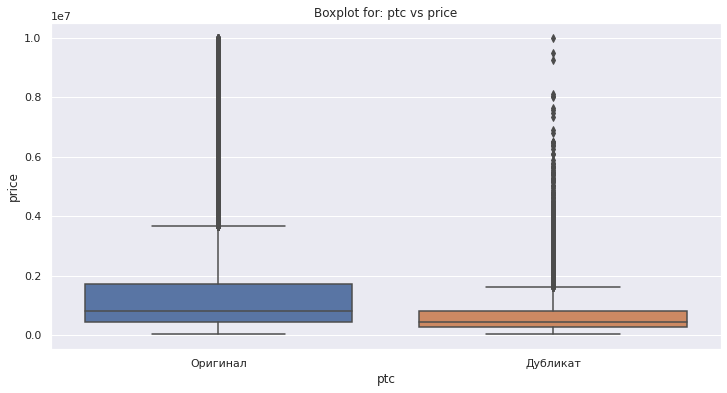

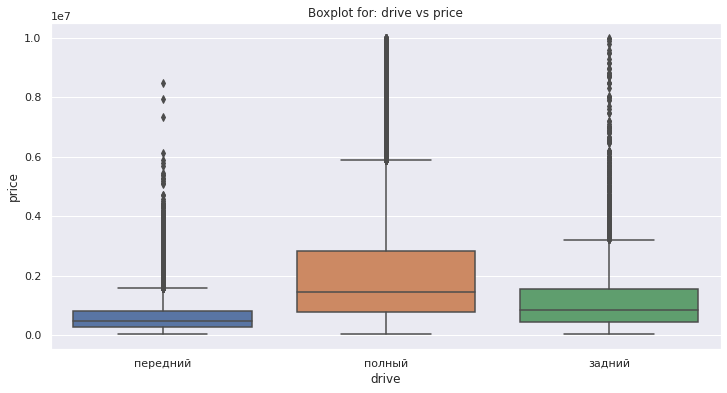

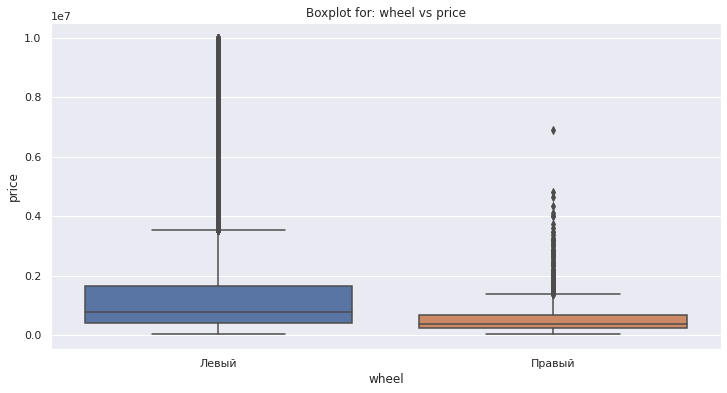

In [21]:
for c in cat_cols:
    show_boxplots(train.query("price < 10_000_000"), c, "price")

## Automated EDA

In [22]:
comp = sv.compare(train, test)

                                             |      | [  0%]   00:00 -> (? left)


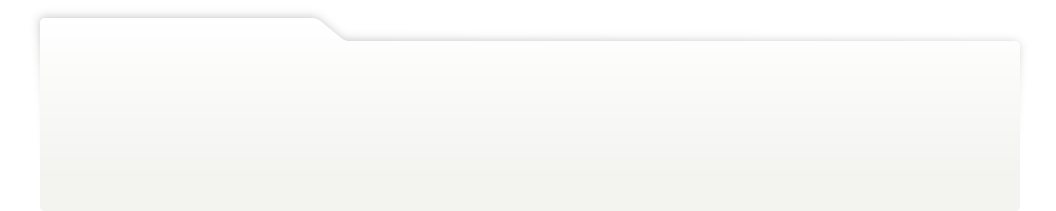
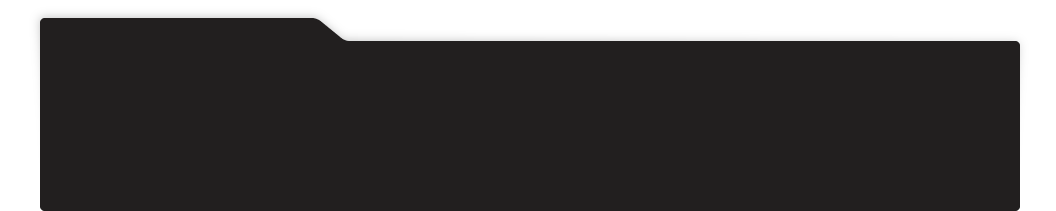
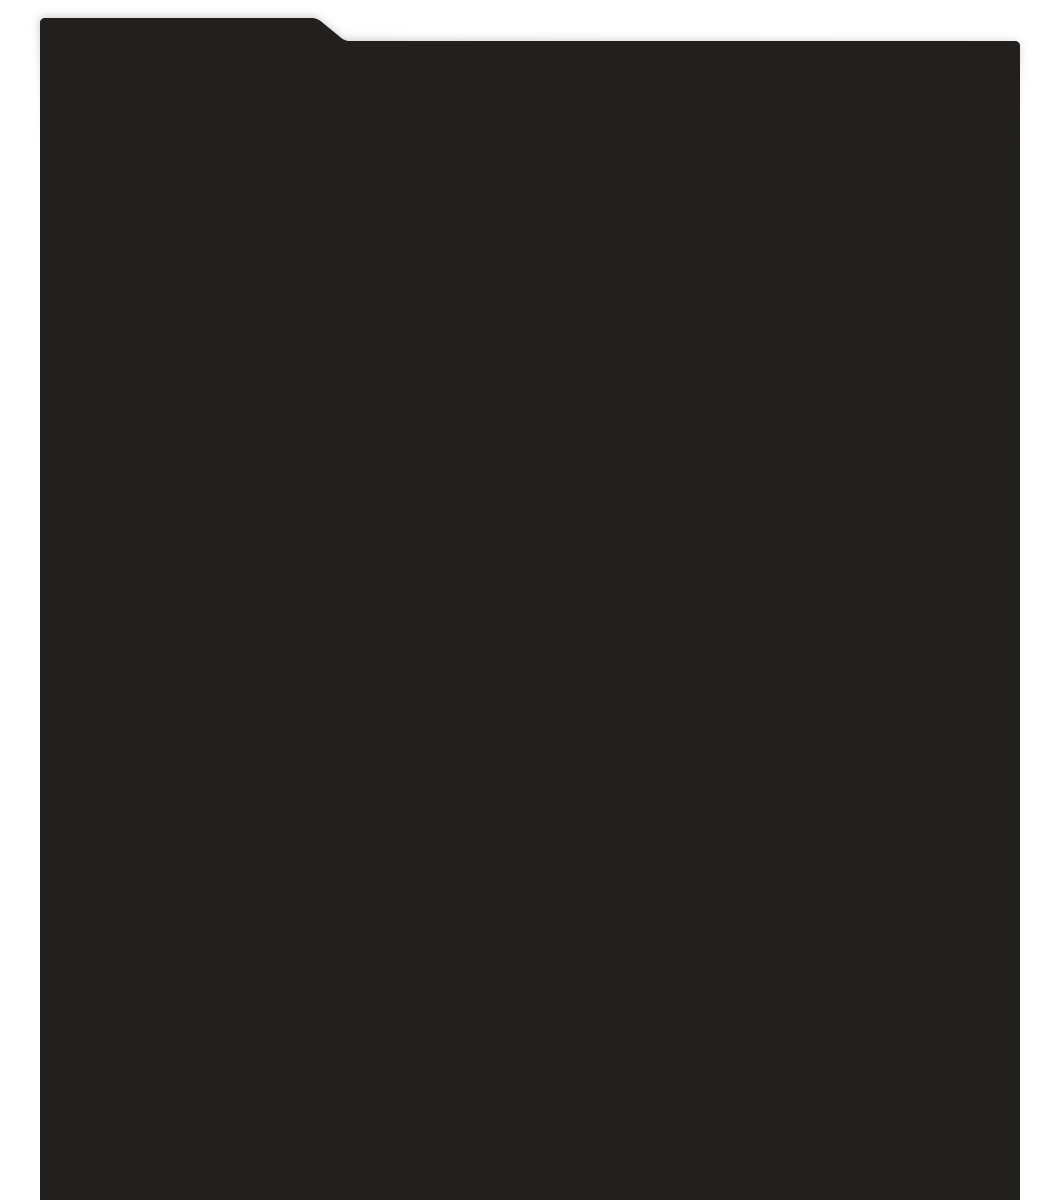
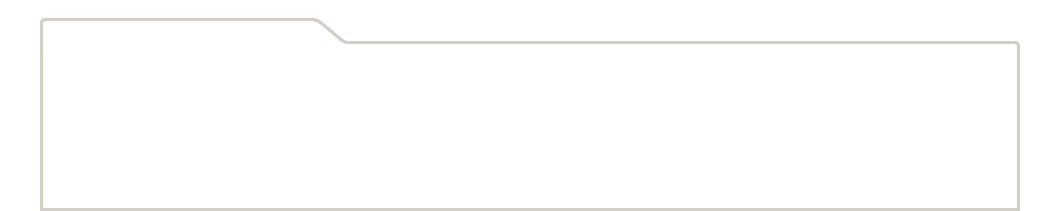
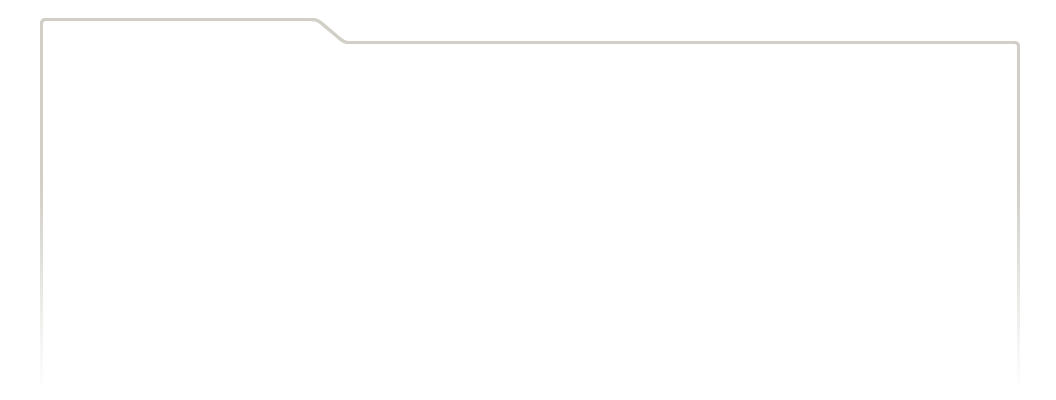
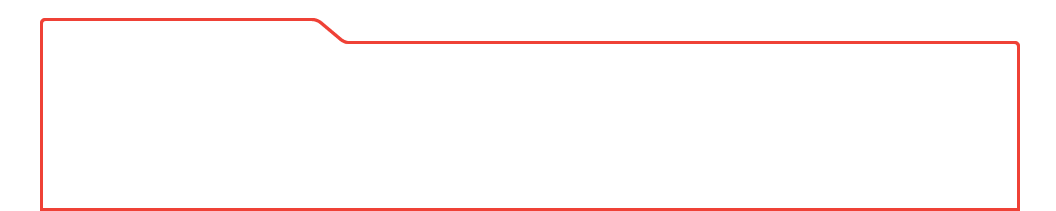
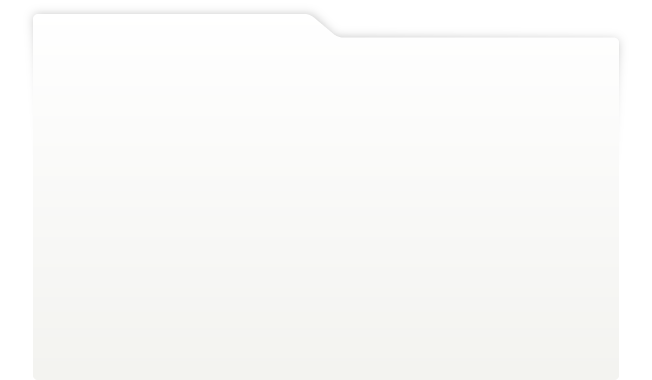
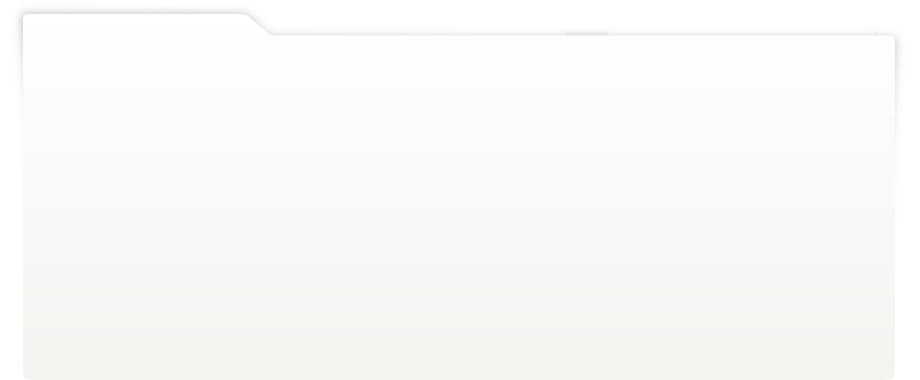
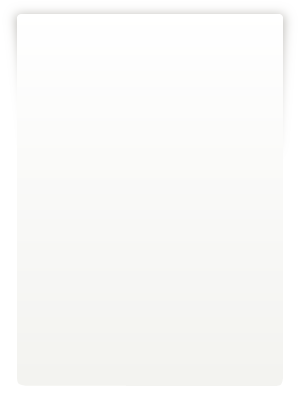
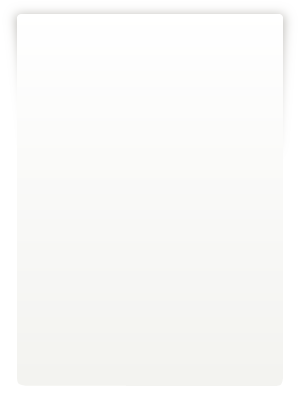
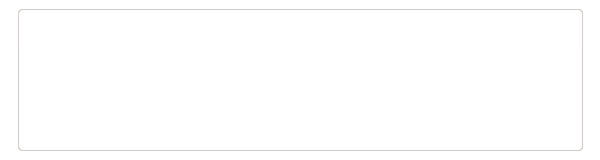
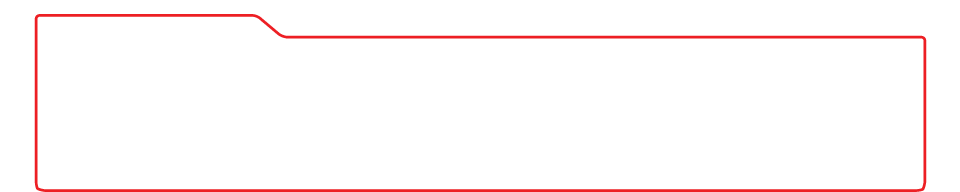
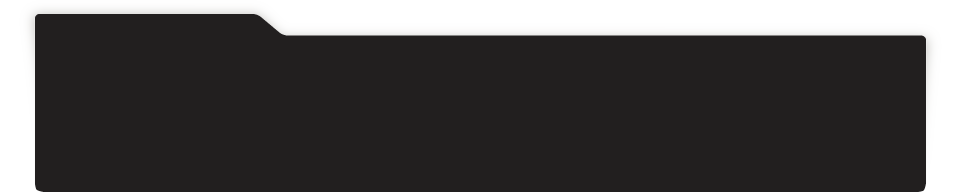
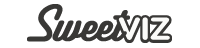
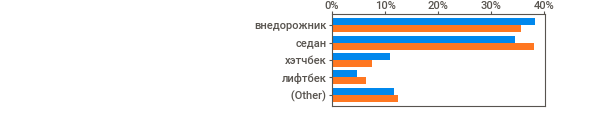
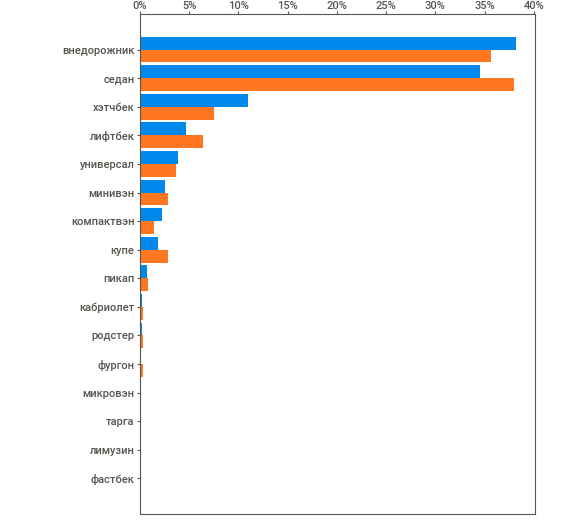
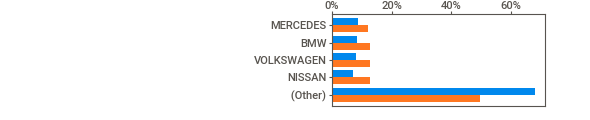
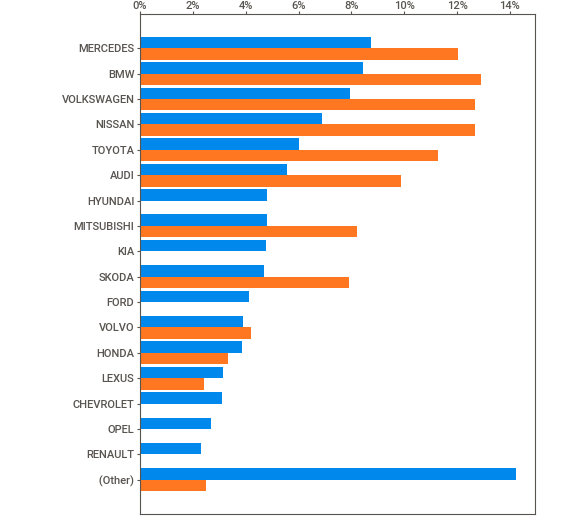
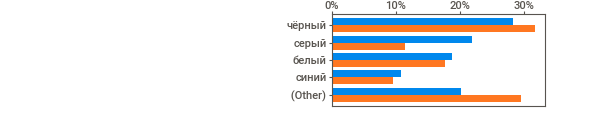
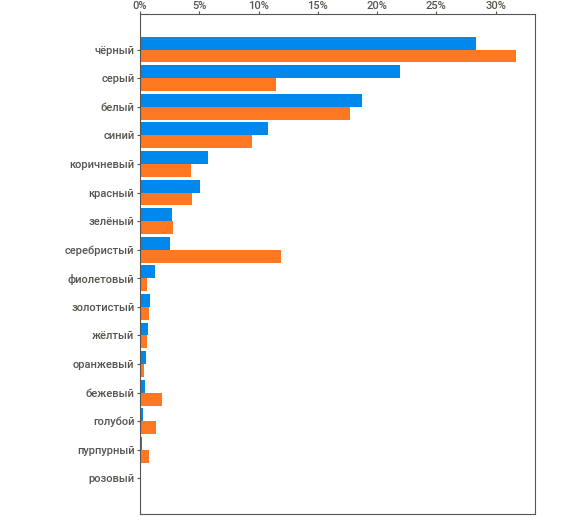
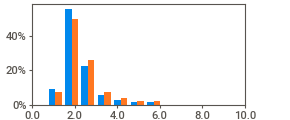
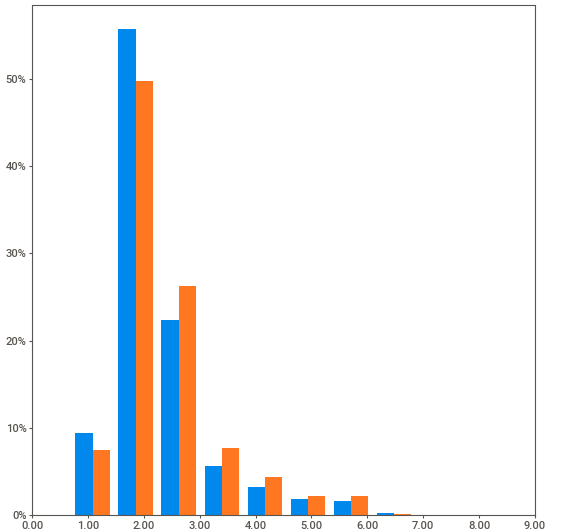
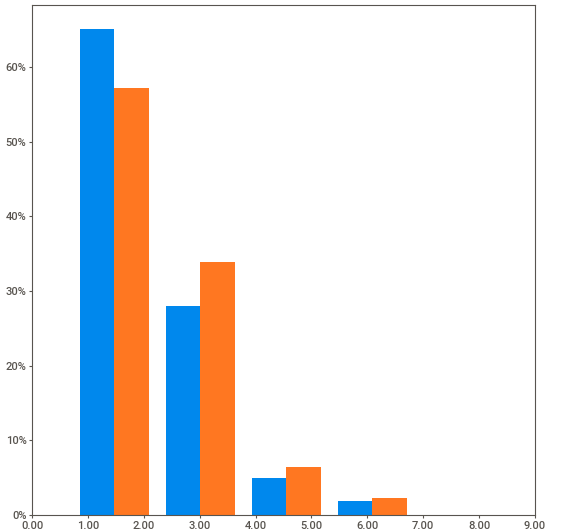
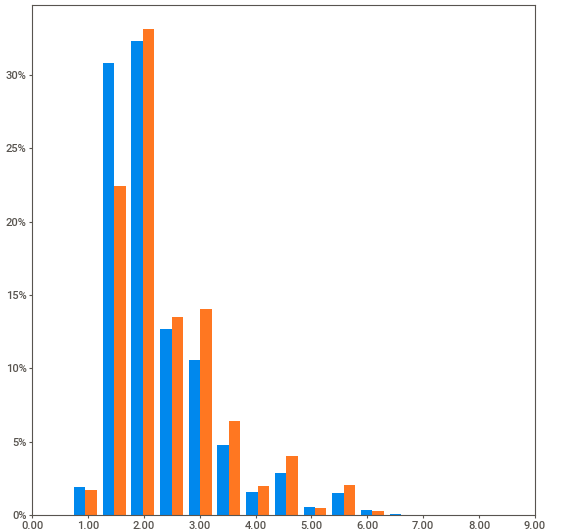
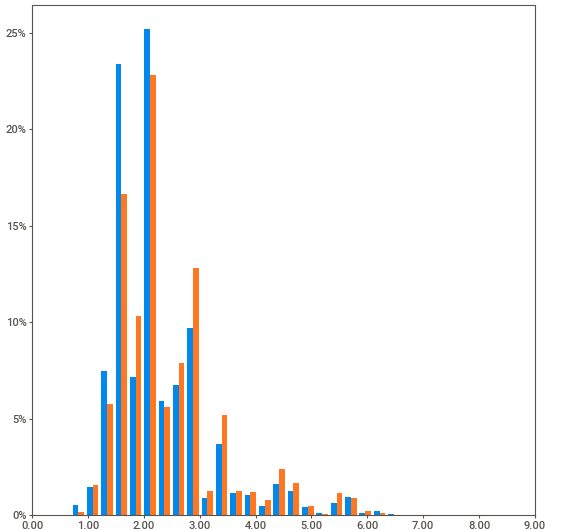
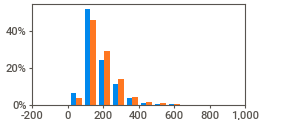
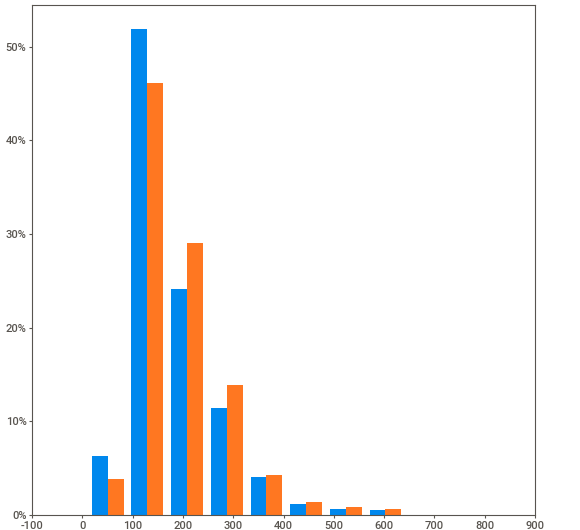
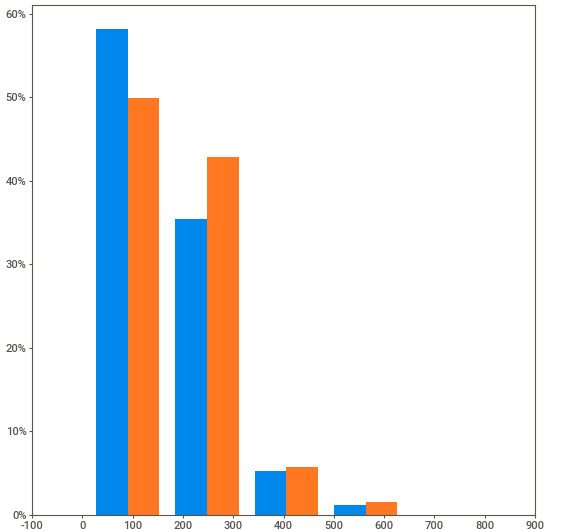
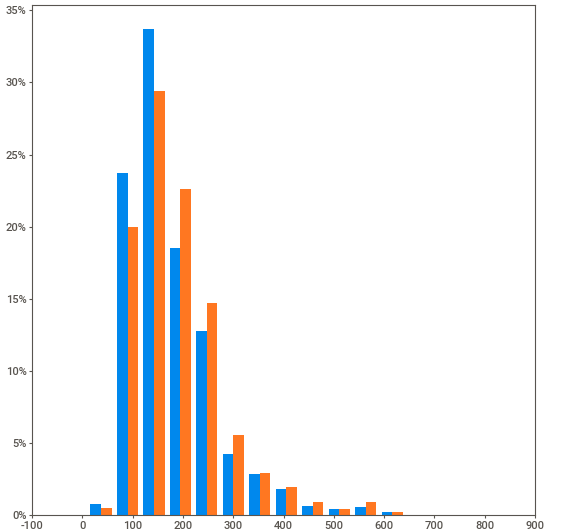
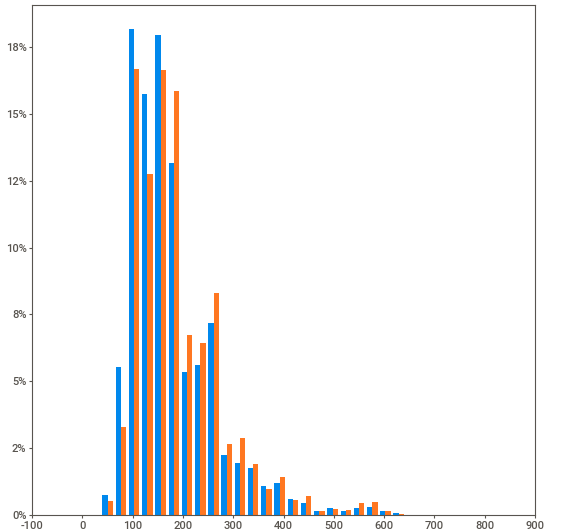
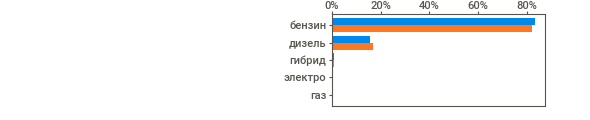
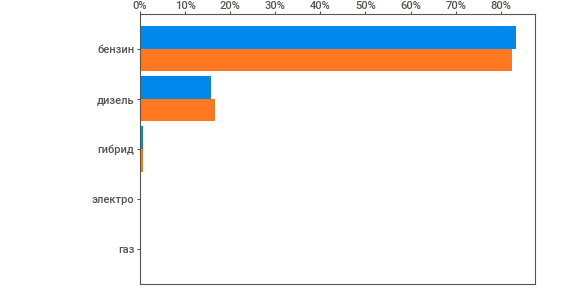
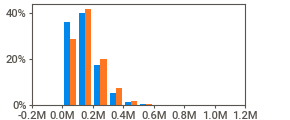
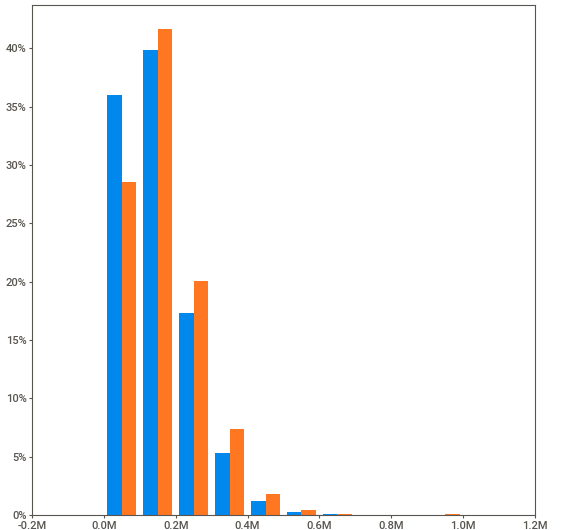
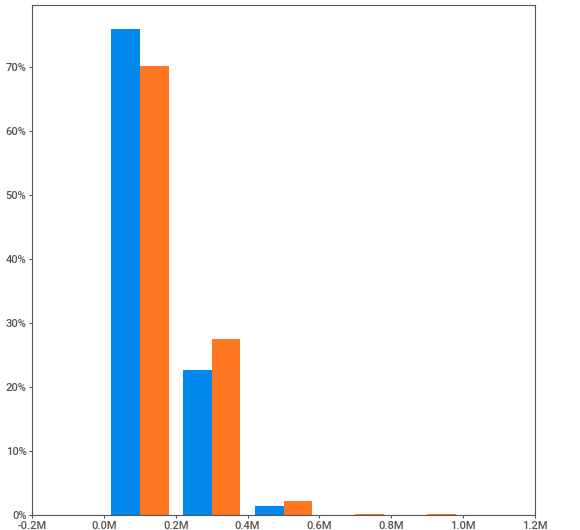
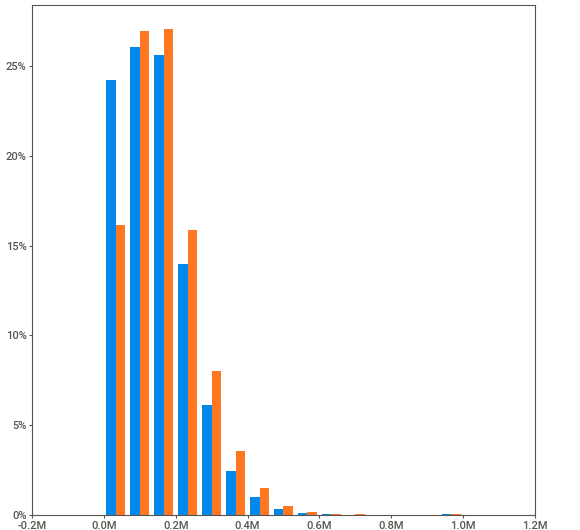
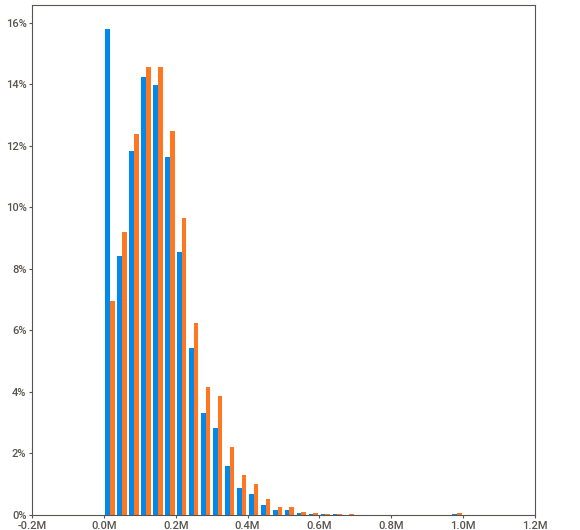
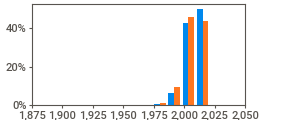
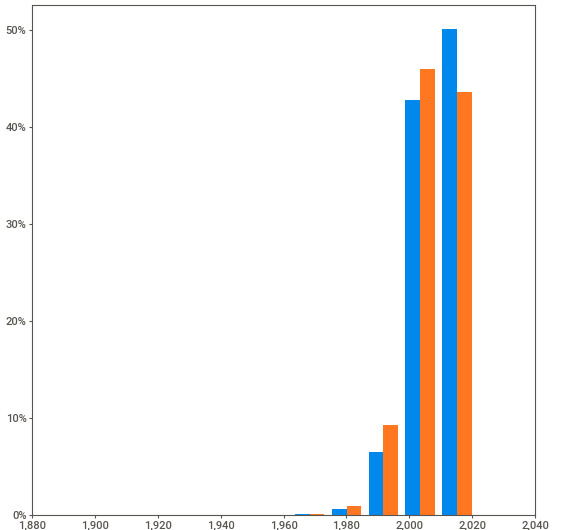
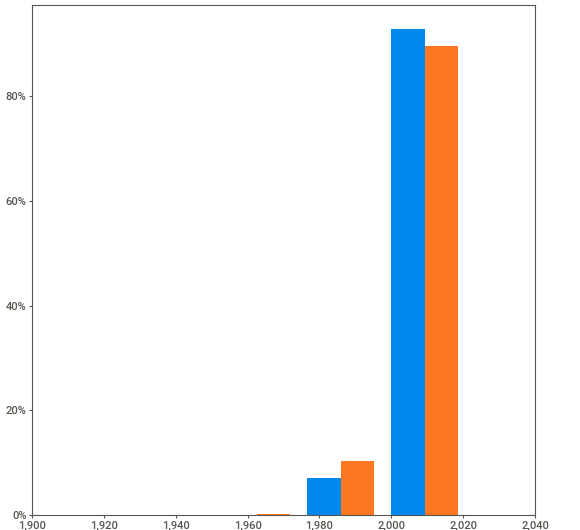
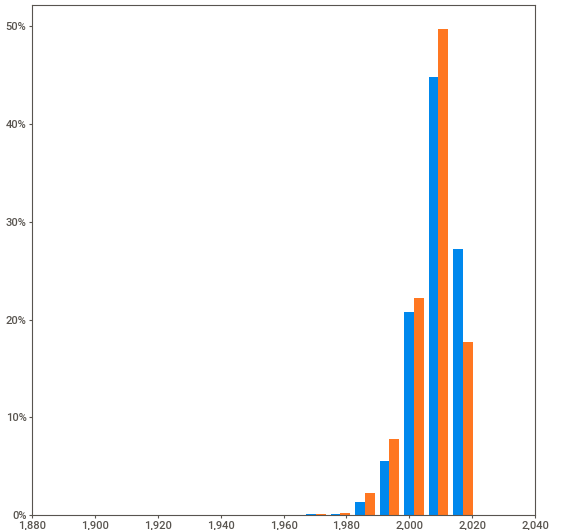
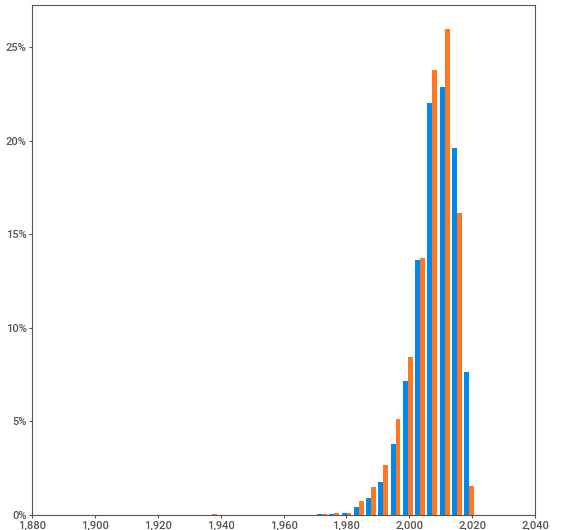
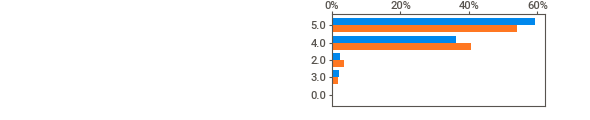
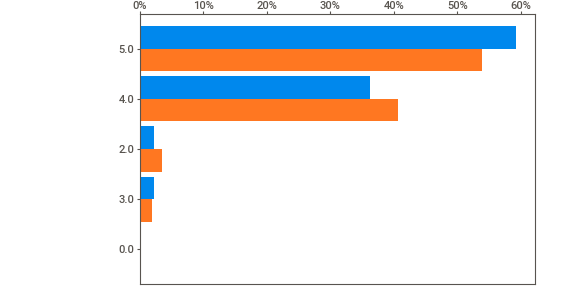
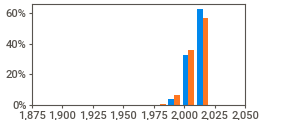
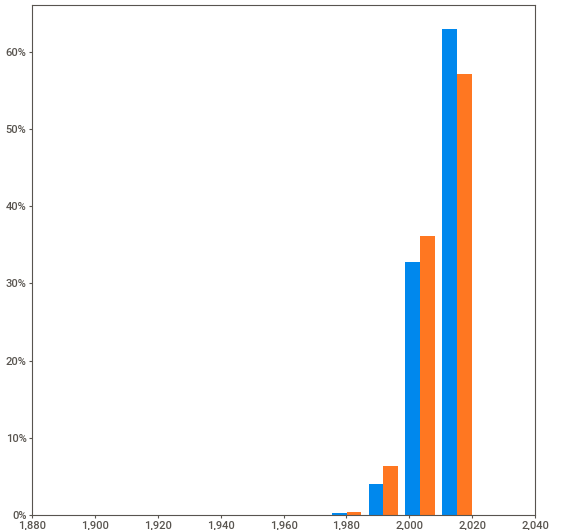
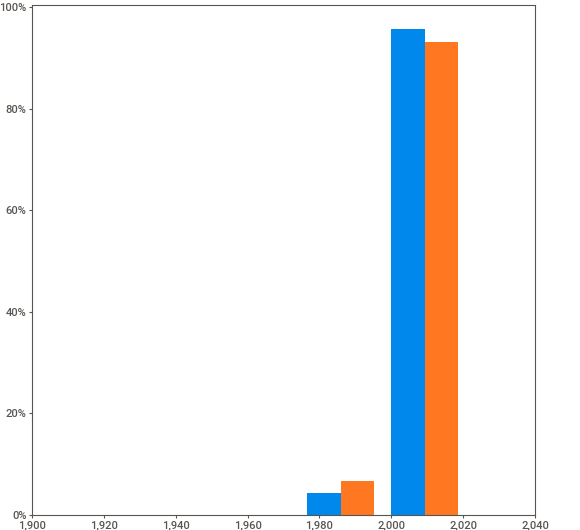
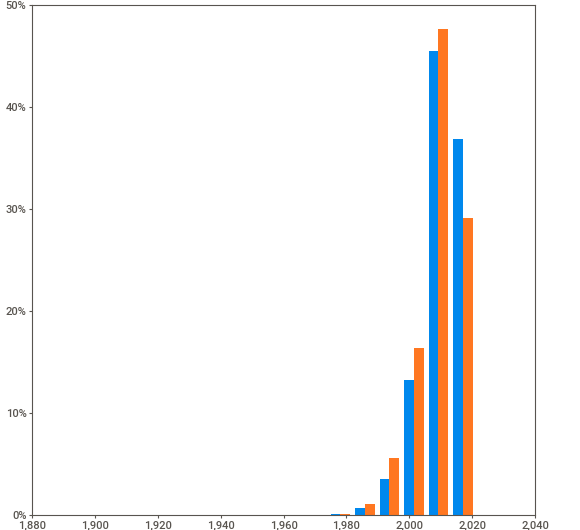
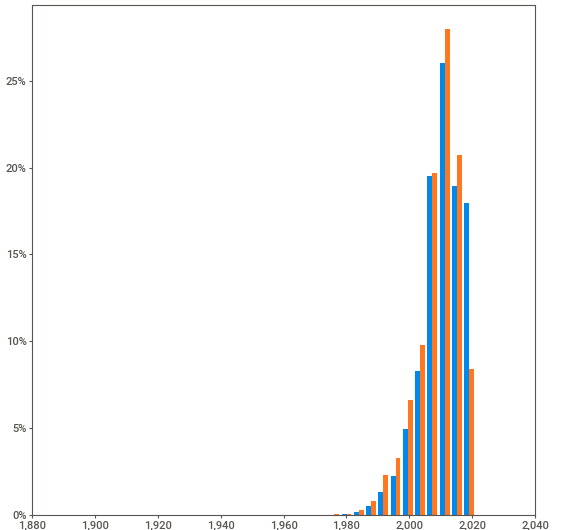
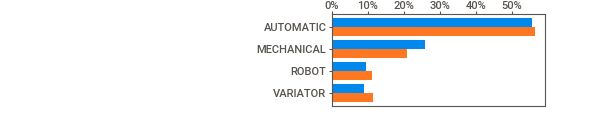
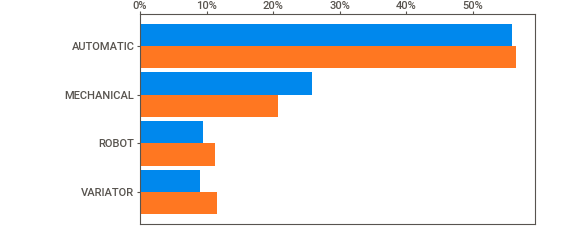
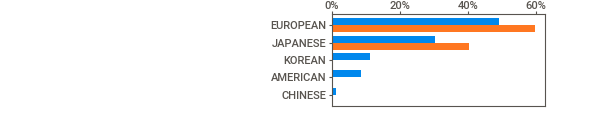
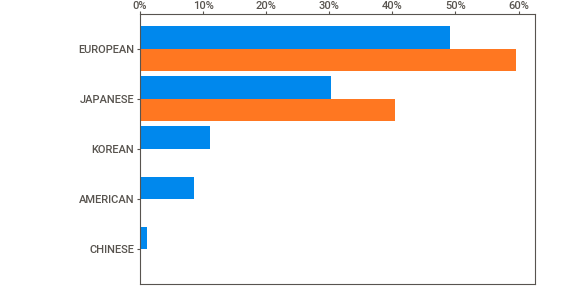
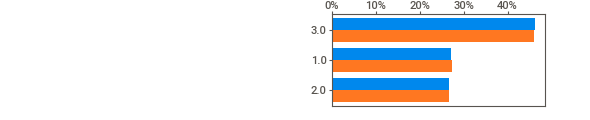
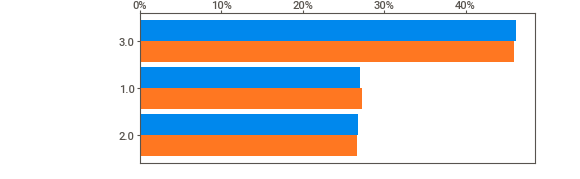
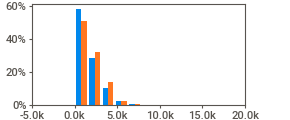
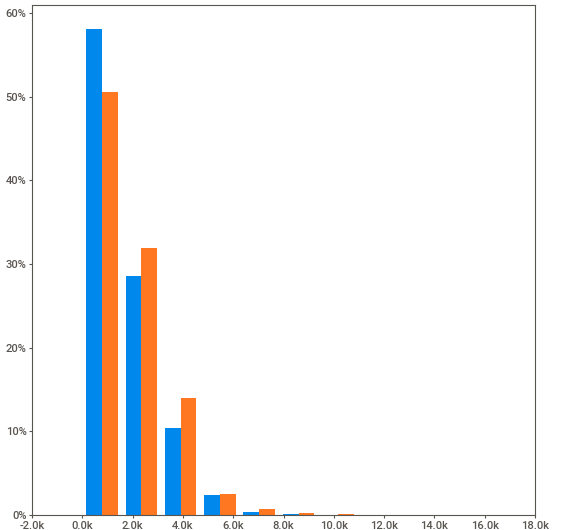
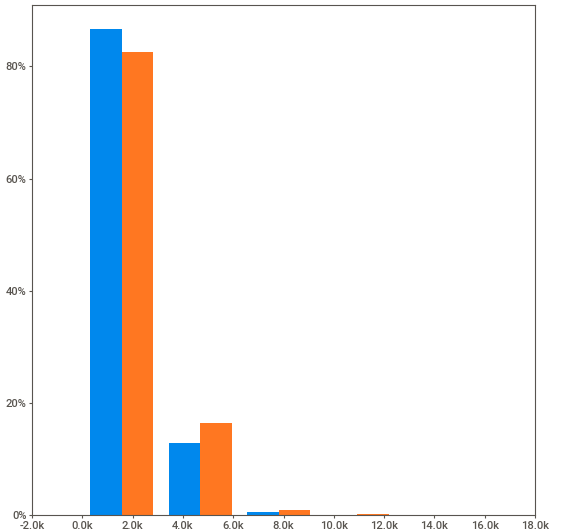
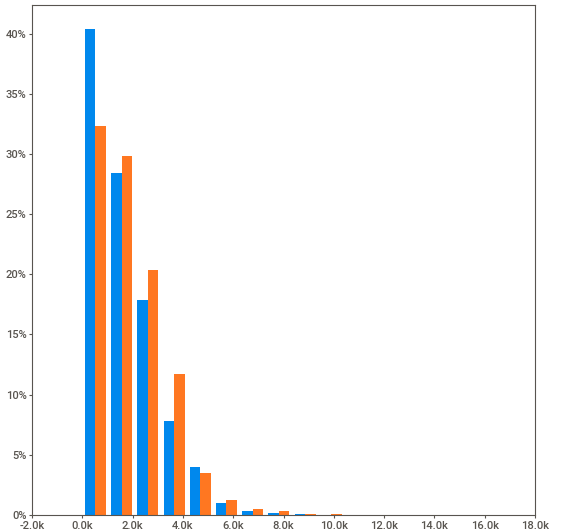
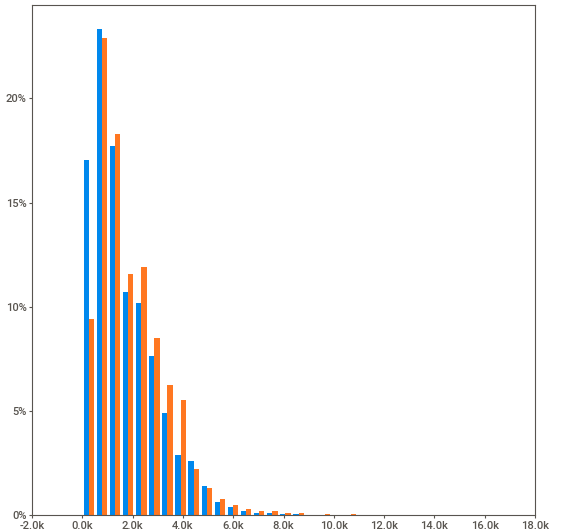
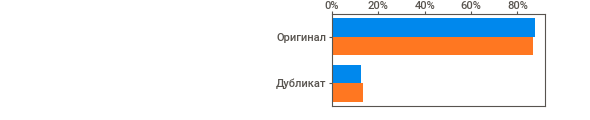
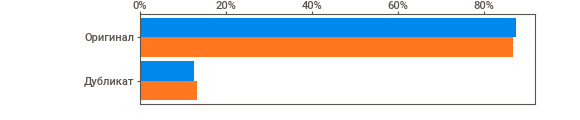
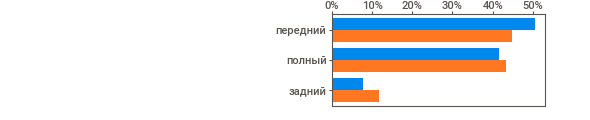
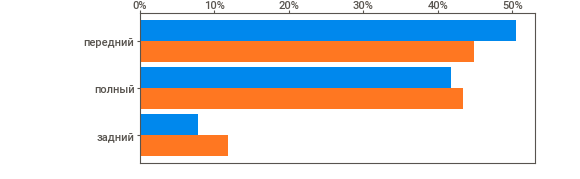
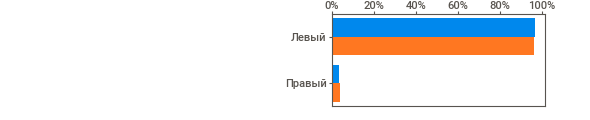
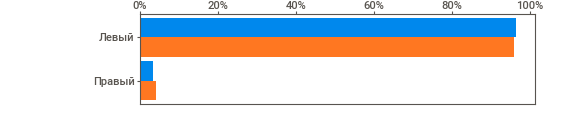
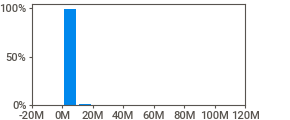
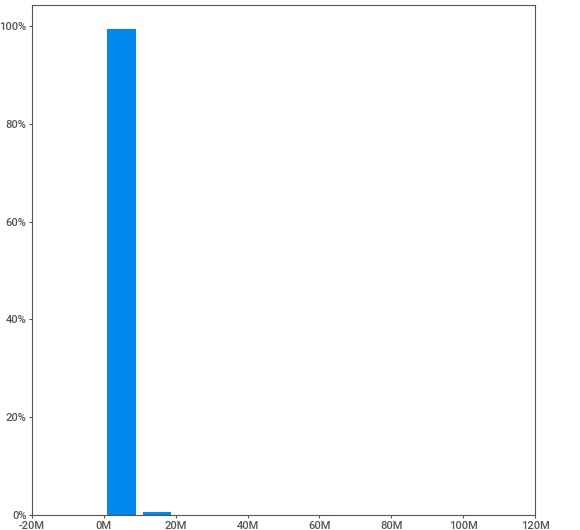
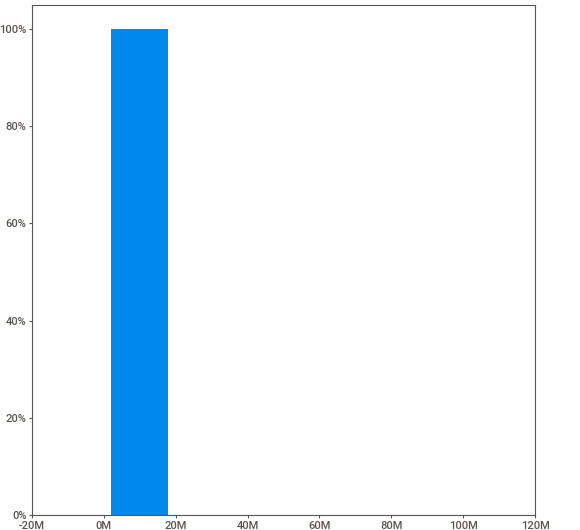
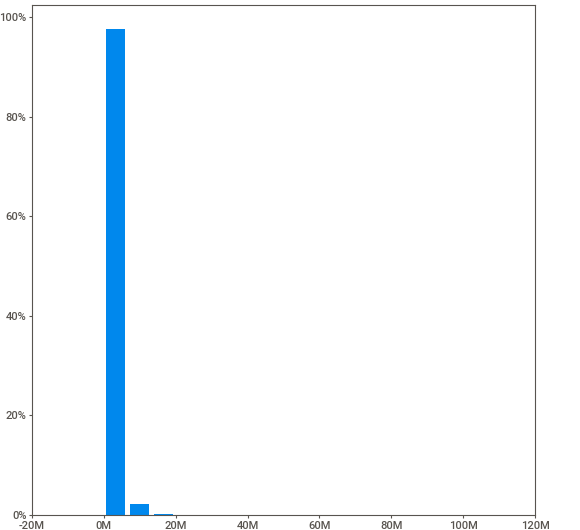
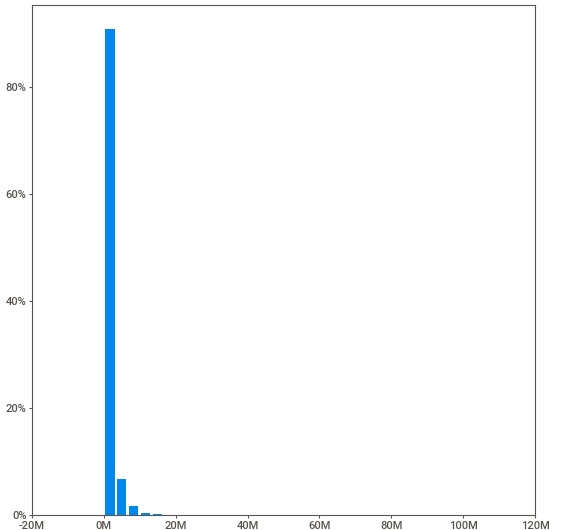
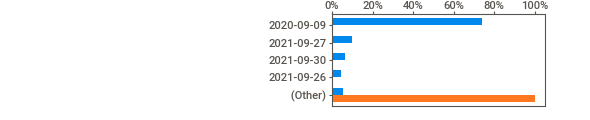
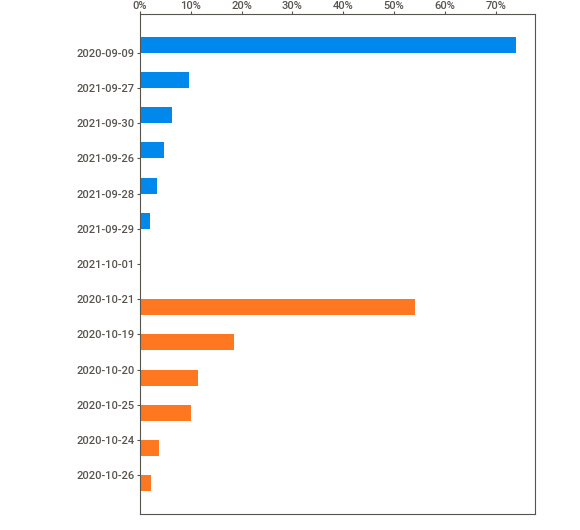
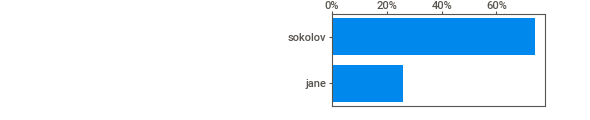
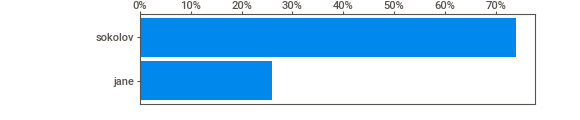
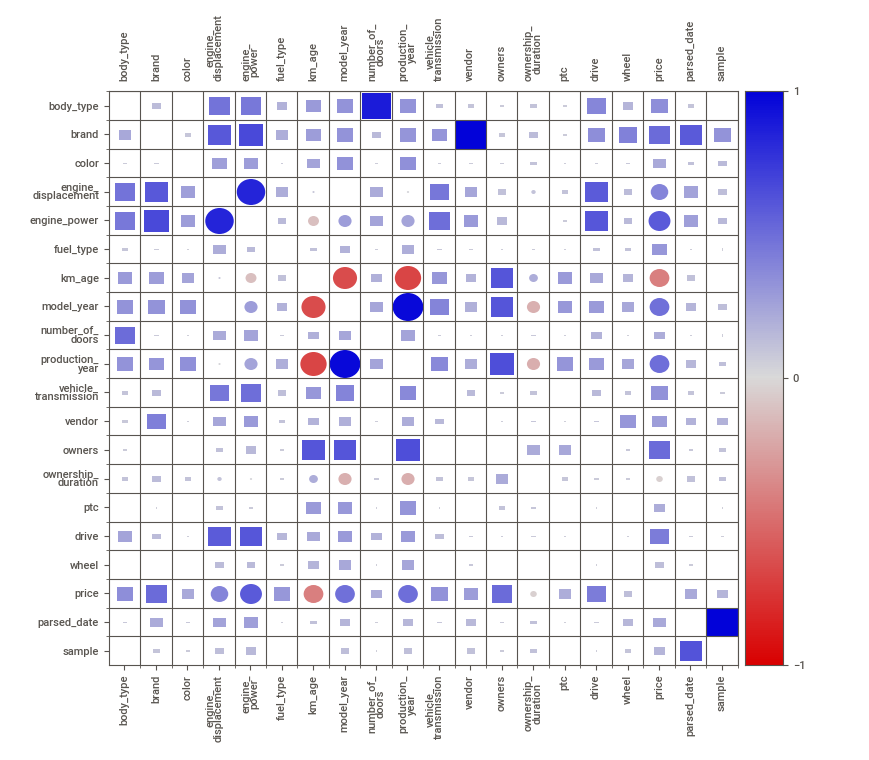
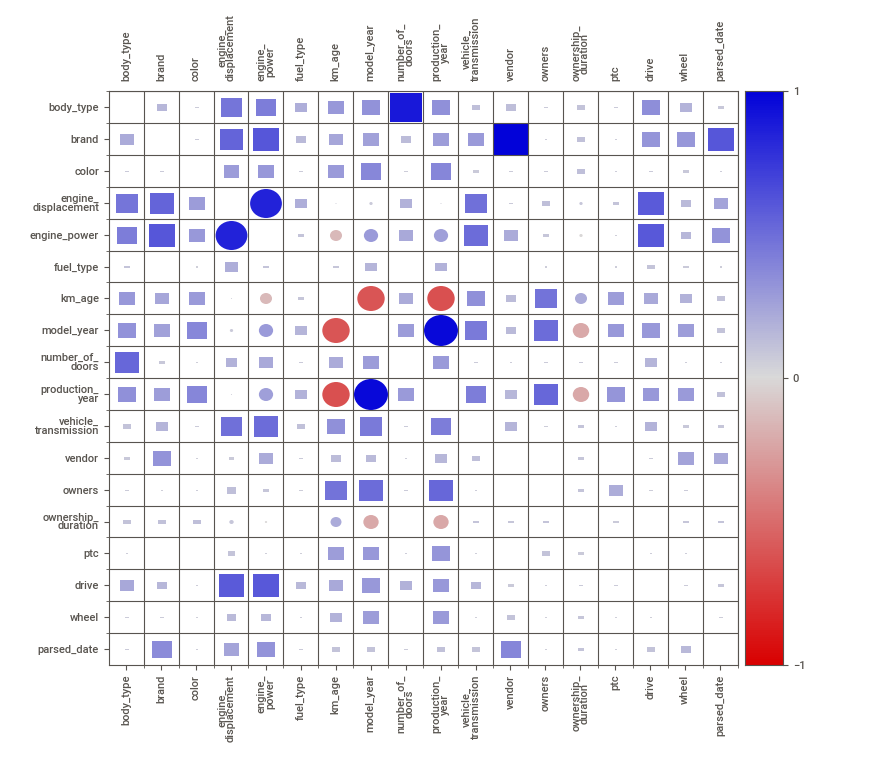

In [23]:
comp.show_notebook()

## Teatures TO DO

- **body_type** - fill na
- **brand** - 
- **color** - 
- **description** - 
- **engine_displacement** - 
- **engine_power** - 
- **fuel_type** - 
- **km_age** - 
- **model_year** - 
- **number_of_doors** - 
- **production_year** - 
- **vehicle_transmission** - 
- **vendor** - 
- **oweners** - 
- **owenership_duration** - 
- **ptc** - 
- **drive** - 
- **wheel** - 
- **price** - 

In [24]:
train.loc[train.body_type.isna()]

,body_type,brand,color,description,engine_displacement,engine_power,fuel_type,km_age,model_year,model_name,number_of_doors,production_year,vehicle_transmission,vendor,owners,ownership_duration,ptc,drive,wheel,price,parsed_date,sample


In [25]:
train.body_type.value_counts(dropna=False)

внедорожник    44065
седан          39812
хэтчбек        12606
лифтбек         5358
универсал       4489
минивэн         2947
компактвэн      2552
купе            2064
пикап            794
кабриолет        242
родстер          191
фургон           174
микровэн          54
тарга              9
лимузин            7
фастбек            3
Name: body_type, dtype: int64

In [26]:
test.body_type.value_counts(dropna=False)

седан          13165
внедорожник    12346
хэтчбек         2609
лифтбек         2232
универсал       1276
минивэн          995
купе             982
компактвэн       489
пикап            290
родстер           99
фургон            97
кабриолет         90
микровэн           7
лимузин            6
тарга              2
фастбек            1
Name: body_type, dtype: int64

#### 2 rows we can drop (they are informless)

In [27]:
train.loc[(train.km_age.isna()) & (train['production_year'] <= 2020.1)]

,body_type,brand,color,description,engine_displacement,engine_power,fuel_type,km_age,model_year,model_name,number_of_doors,production_year,vehicle_transmission,vendor,owners,ownership_duration,ptc,drive,wheel,price,parsed_date,sample


## My opinion - it's new cars. We can fill NaNs by 0 or random (20-50 km)

In [28]:
electro_mask = (train.engine_displacement.isna()) & (train.fuel_type == 'электро')
train.loc[electro_mask, 'engine_displacement'] = 0

## So it's electro cars. We can fill NaNs by 0

In [29]:
train.loc[train.owners.isna()][['parsed_date', 'production_year']].value_counts()

parsed_date  production_year
2020-09-09   2020.0             9537
             2019.0              916
             2018.0               81
             2017.0                1
dtype: int64

In [30]:
train['parsed_date'] = pd.to_datetime(train['parsed_date'])
train['production_year'] = pd.to_datetime(train['production_year'].astype(int).astype(str))

In [31]:
train['diff_data'] = train['parsed_date'] - train['production_year']

In [32]:
train.loc[train.owners.isna()][['diff_data']].value_counts()

diff_data
252 days     9537
617 days      916
982 days       81
1347 days       1
dtype: int64

In [33]:
mask1 = train['diff_data'].astype('timedelta64[D]') < 365
mask2 = train['diff_data'].astype('timedelta64[D]').between(365, 730)
mask3 = train['diff_data'].astype('timedelta64[D]') >= 730
train.loc[mask1, 'owners'] = 1
train.loc[mask2, 'owners'] = 2
train.loc[mask3, 'owners'] = 3

### Fill NaN's in description

In [34]:
mask_descr = train['description'].isna()
train.loc[mask_descr, 'description'] = 'No description'

### Fix Jane Price

In [35]:
train[train['sample'] == 'jane']['price'] = train['price'] * 0.86

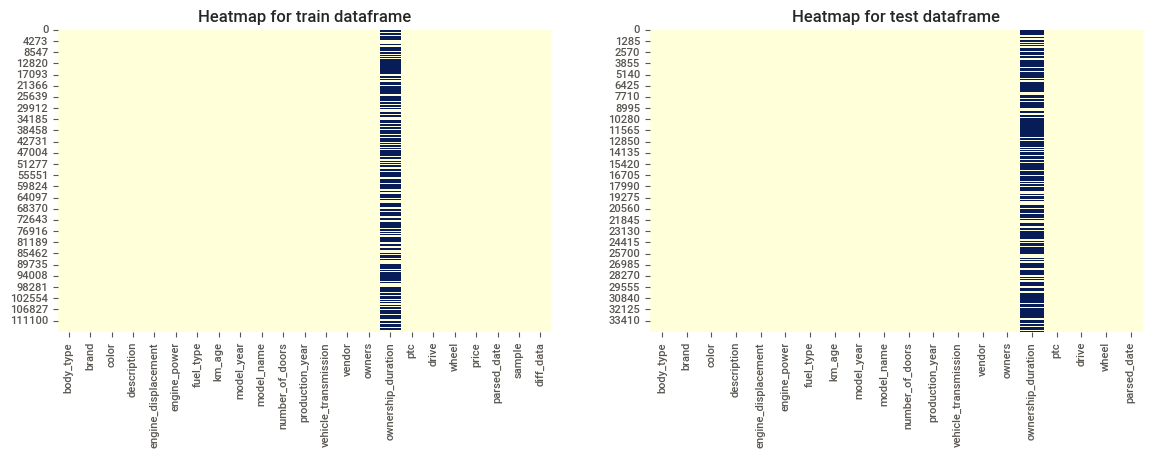

In [36]:
plot_nans_heatmap(train, test)

## removing cols

In [37]:
del train["model_name"]
del test["model_name"]
del train["ownership_duration"]
del test["ownership_duration"]

## notes, next steps

1. fill na
   - owners
2. feature engeneering
   - parced_year - production_year
3. price multiply * 0.86 for jane only
4. numerize cats
5. standartize nums

## preparing to simple model

In [38]:
train.dtypes

body_type                        object
brand                            object
color                            object
description                      object
engine_displacement             float64
engine_power                    float32
fuel_type                        object
km_age                          float32
model_year                      float32
number_of_doors                 float32
production_year          datetime64[ns]
vehicle_transmission             object
vendor                           object
owners                          float64
ptc                              object
drive                            object
wheel                            object
price                           float64
parsed_date              datetime64[ns]
sample                           object
diff_data               timedelta64[ns]
dtype: object

In [39]:
test.dtypes

body_type                object
brand                    object
color                    object
description              object
engine_displacement     float64
engine_power            float32
fuel_type                object
km_age                  float32
model_year              float32
number_of_doors         float32
production_year         float32
vehicle_transmission     object
vendor                   object
owners                  float32
ptc                      object
drive                    object
wheel                    object
parsed_date              object
dtype: object

In [40]:
def dumb_preprocessing(df: pd.DataFrame) -> pd.DataFrame:
    return pd.get_dummies(df, columns=df.select_dtypes("object").columns.tolist())

In [41]:
dumb_preprocessing(test).sample(5, random_state=42).T

,19026,3337,11807,18661,11783
engine_displacement,2.0,1.8,2.0,1.8,2.0
engine_power,150.0,125.0,141.0,184.0,141.0
km_age,121490.0,240000.0,104842.0,68000.0,170000.0
model_year,2000.0,1994.0,2010.0,2009.0,2010.0
number_of_doors,5.0,4.0,5.0,2.0,5.0
...,...,...,...,...,...
parsed_date_2020-10-20,0.0,0.0,0.0,0.0,0.0
parsed_date_2020-10-21,1.0,0.0,1.0,1.0,1.0
parsed_date_2020-10-24,0.0,0.0,0.0,0.0,0.0
parsed_date_2020-10-25,0.0,0.0,0.0,0.0,0.0
